In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout , Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load dataset
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(train_X.shape)
print(test_X.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


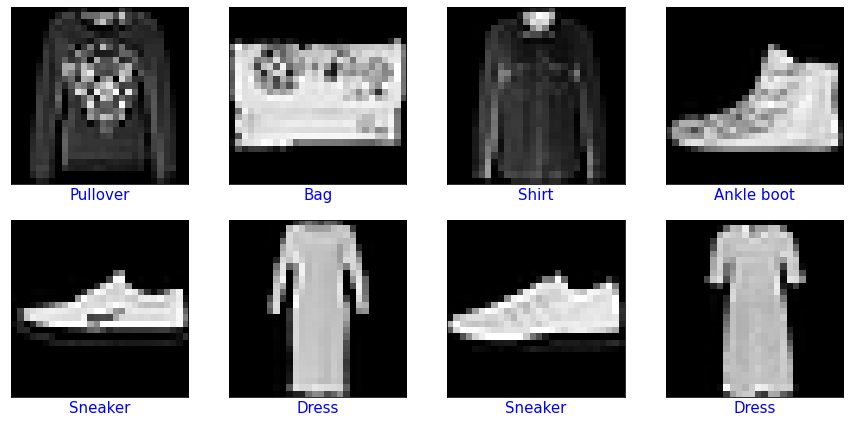

In [4]:
#Display image from datasets
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
n = 8
s = np.random.randint(0,train_Y.shape[0]-n)
plt.figure(figsize=(15, 15))
for i in range(s, n+s):
  plt.subplot(440+1+i-s)
  plt.xticks([])
  plt.yticks([])

  plt.xlabel(class_names[train_Y[i]], color='b', fontsize=15)

  plt.imshow(train_X[i], cmap='gist_gray')
plt.show()


In [5]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

#Scaling Data for SGD: [0,225]->[0,1]
train_X = train_X/255.0
test_X = test_X/255.0



In [6]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)

num_classes=train_Y.shape[1]

In [7]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)

In [8]:
#Build mode 
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               8

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer= SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

In [11]:
# Train model
history = model.fit(train_X, train_Y, validation_data = (test_X,test_Y),epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.5828 - accuracy: 0.7847 - val_loss: 0.3650 - val_accuracy: 0.8659
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3466 - accuracy: 0.8734 - val_loss: 0.3187 - val_accuracy: 0.8842
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2928 - accuracy: 0.8933 - val_loss: 0.2815 - val_accuracy: 0.8968
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2597 - accuracy: 0.9053 - val_loss: 0.2618 - val_accuracy: 0.9024
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2391 - accuracy: 0.9113 - val_loss: 0.2727 - val_accuracy: 0.8975
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2205 - accuracy: 0.9181 - val_loss: 0.2421 - val_accuracy: 0.9113
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2049 - accuracy: 0.9246 - val_loss: 0.2452 - val_accuracy

In [16]:
loss, accuracy = model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2611 - accuracy: 0.9197


In [17]:
#Save model
model.save('/content/drive/MyDrive/Fashion_MNIST_Classification/my_model.h5')

In [19]:
#Load model
model = load_model('/content/drive/MyDrive/Fashion_MNIST_Classification/my_model.h5')
model.evaluate(test_X, test_Y)


313/313 [==============================] - 1s 3ms/step - loss: 0.2611 - accuracy: 0.9197


[0.26108795404434204, 0.919700026512146]

# Plot Learning Curve


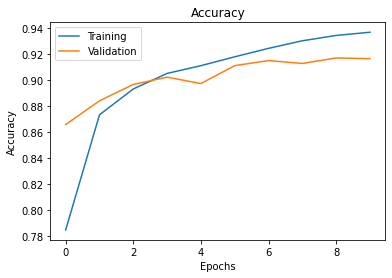

In [20]:
plt.figure(0)
plt.plot(history.history['accuracy'], label ='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

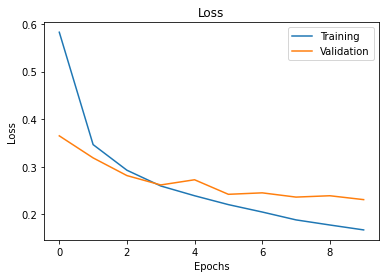

In [21]:
plt.figure(0)
plt.plot(history.history['loss'], label ='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

313/313 [==============================] - 1s 2ms/step


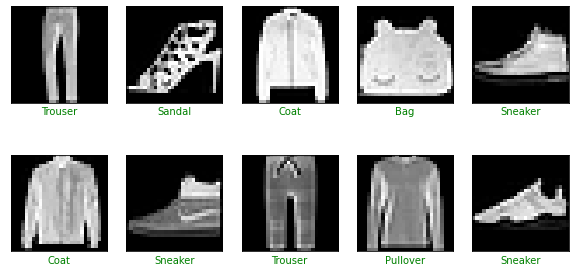

In [22]:
pred = model.predict(test_X)
pred_class = np.argmax(pred,axis=1)
true_test_label = np.argmax(test_Y,axis=1)

class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Draw
plt.figure(figsize=(10,5))
choice = np.random.choice(range(test_X.shape[0]),10)

for i, index in enumerate(choice):
  plt.subplot(2, 5, i+1)
  plt.imshow(test_X[index].reshape(28,28), cmap ='gist_gray')
  plt.xticks([])
  plt.yticks([])

  if pred_class[index] == true_test_label[index]:
     col = 'g'
     plt.xlabel(class_names[pred_class[index]], color = col)
  else:
    col = 'r'
    plt.xlabel(
        f"{class_names[true_test_label[index]]} not {class_names[pred_class[index]]}",
        color =col
    )




# Test with Image

1/1 [==============================] - 0s 18ms/step
Sandal


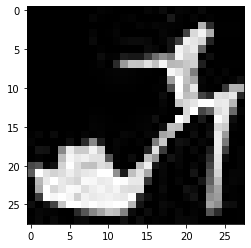

In [24]:
import cv2
import os.path as osp

img_name = 'Sandal.jpg'
file_path = '/content/drive/MyDrive/Fashion_MNIST_Classification/Test'

img = cv2.imread(osp.join(file_path, img_name), cv2.IMREAD_GRAYSCALE)
width = int(img.shape[1]*(28/img.shape[1]))
height = int(img.shape[1]*(28/img.shape[0])) 
dim = (width, height)

#resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
# scale and reshape
resized = resized/255.

#resized = 1 - resized
plt.imshow(resized, cmap='gist_gray')

resized = resized.reshape(28,28,1)
#Predict
test_pred_prob = model.predict(np.array([resized]))
#Get index of max
test_pred = np.argmax(test_pred_prob)
print(class_names[test_pred])
